In [347]:
import pandas as pd
import numpy as np
 
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Generowanie przykładowych danych

In [348]:
n_cls = 20   # Number of samples in each class.
 
np.random.seed(1)  # for reproducibility
x11 = np.random.normal(0.5, 1, (n_cls, 1))
np.random.seed(2)  # for reproducibility
x12 = np.random.normal(0.4, 1, (n_cls, 1))
np.random.seed(3)  # for reproducibility
x21 = np.random.normal(-0.3, 1, (n_cls, 1))
np.random.seed(4)  # for reproducibility
x22 = np.random.normal(-0.5, 1, (n_cls, 1))
 
X = np.vstack((
    np.hstack((x11, x12)),
    np.hstack((x21, x22))
))
 
y = np.hstack((-1 * np.ones(n_cls), +1 * np.ones(n_cls)))
a = 0

In [349]:
clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
clf.fit(X, y)

SVC(C=1000, kernel='linear', probability=True, random_state=1)

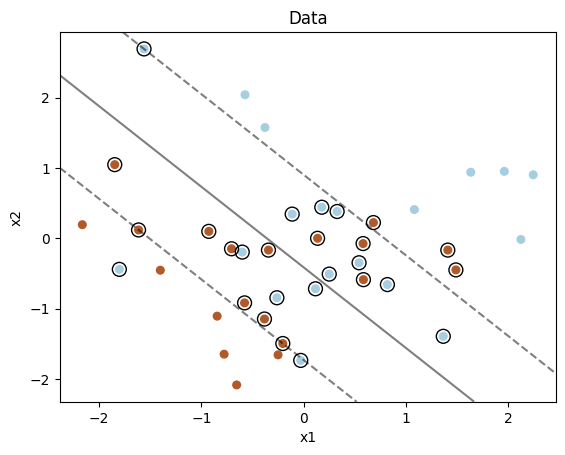

In [350]:
fig = plt.figure(1)
plt.clf()
 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
 
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
 
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data')
plt.show()

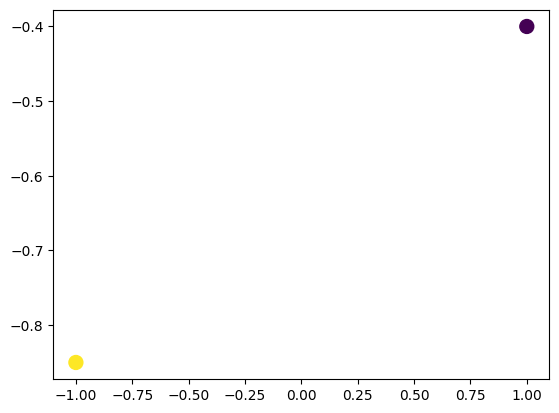

In [351]:
X_new = np.array([
    [1, -0.4],
    [-1, -0.85],
    ])
 
y_new = clf.predict(X_new)
 
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=100)
fig.canvas.draw()
fig.canvas.flush_events()

In [352]:
post_probs = clf.predict_proba(X_new)
print(post_probs)

[[0.62901122 0.37098878]
 [0.26314804 0.73685196]]


Zad1

In [353]:
from sklearn.datasets import load_iris
import seaborn as sns

In [354]:
data = load_iris()

X = data.data
y = data.target
z = 0
columns = data.feature_names

# Stwórz DataFrame z cechami i etykietami
df = pd.DataFrame(X, columns=columns)


Zad 2

Dane jako tabela

In [355]:
df['labels'] = y

print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     labels  
0         0  

Rozkład cech

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>],
       [<Axes: title={'center': 'labels'}>, <Axes: >]], dtype=object)

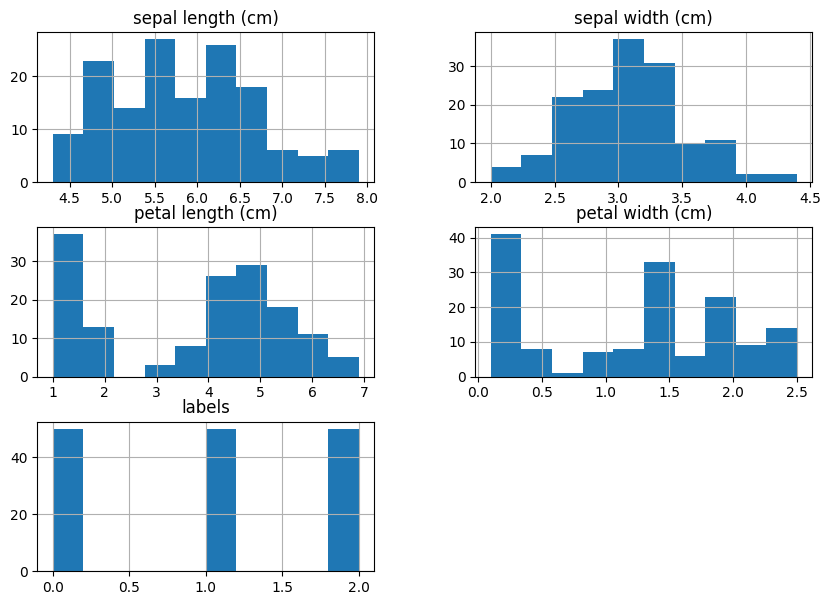

In [356]:
df.hist(figsize=(10,7))

Wykres rozrzutu

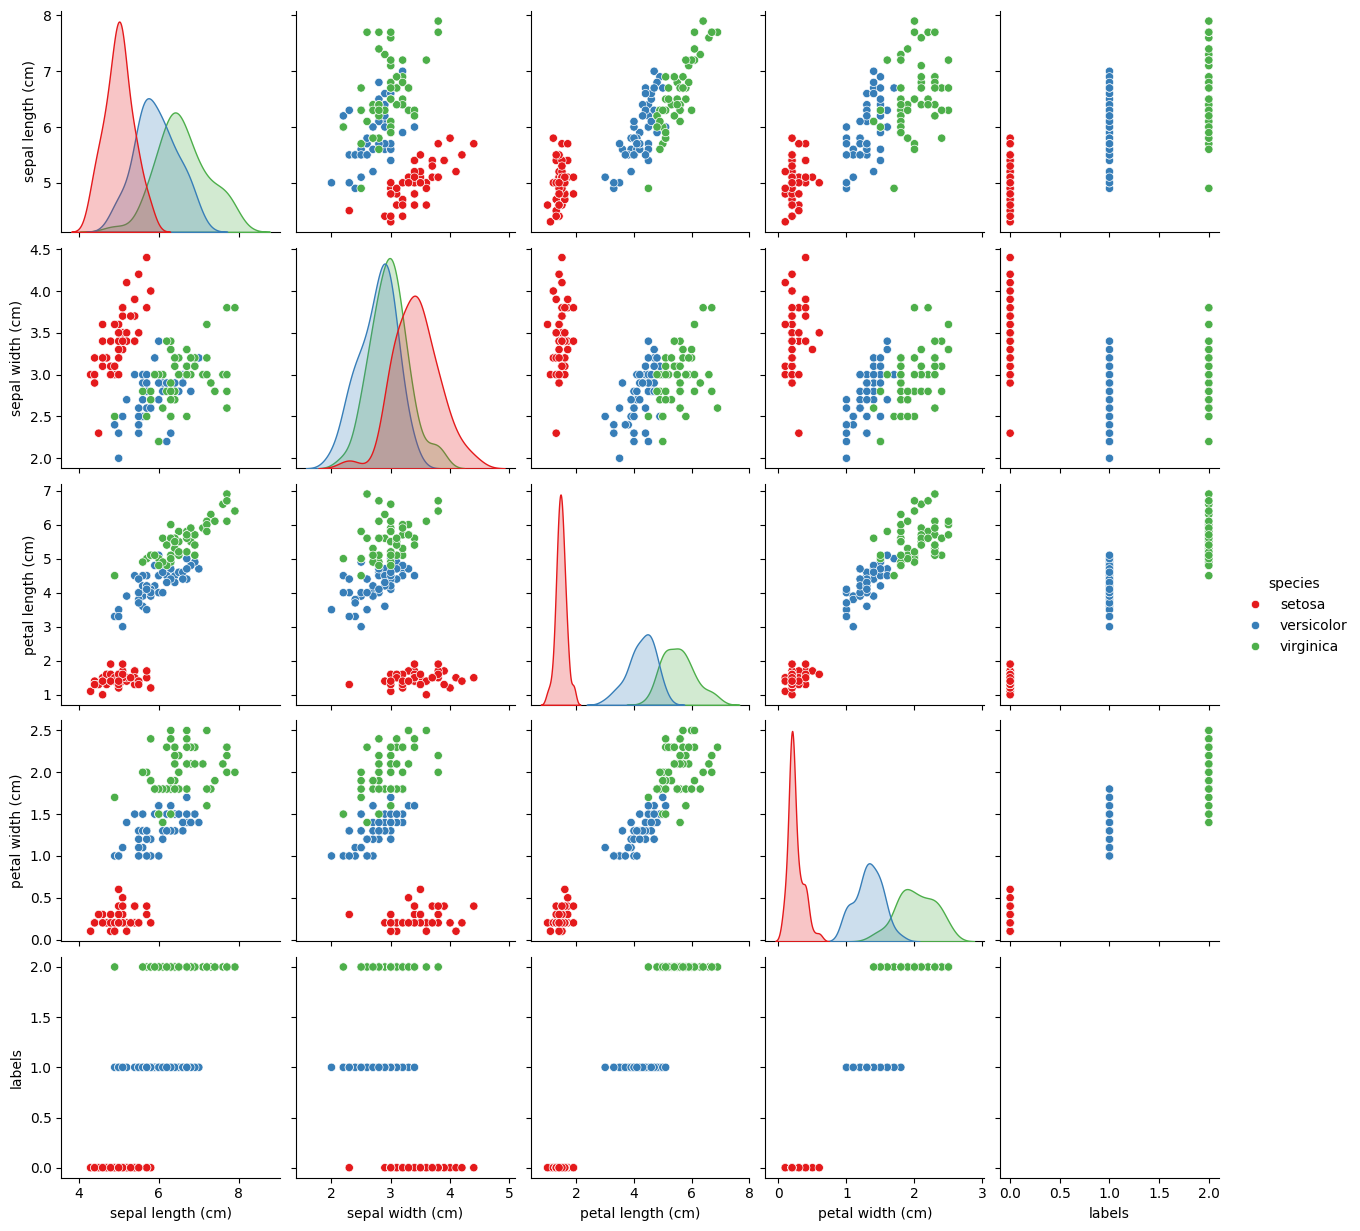

In [357]:

df['species'] = data.target_names[y]

# Rysuj wykresy rozrzutu dla par cech
sns.pairplot(df, hue="species", palette="Set1")
plt.show()
df = df.drop(columns='species')

Klasy są dobrze rozdzielone w przestrzeni cech. Jednak dane mogą czasem nie wystarczyć do rozróżnienia klasy versicolor i virginica - punkty często się mieszają, są bardzo blisko siebie. Klasa sestosa na każdym z wykresów tworzy osobne skupiskow punktów, co wskazuje na łatwe wykrycie tej klasy.

Macierz korelacji

In [359]:
corr_matr = df.drop(columns='labels').corr()
print(corr_matr)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


Heatmap macierz korelacji cech

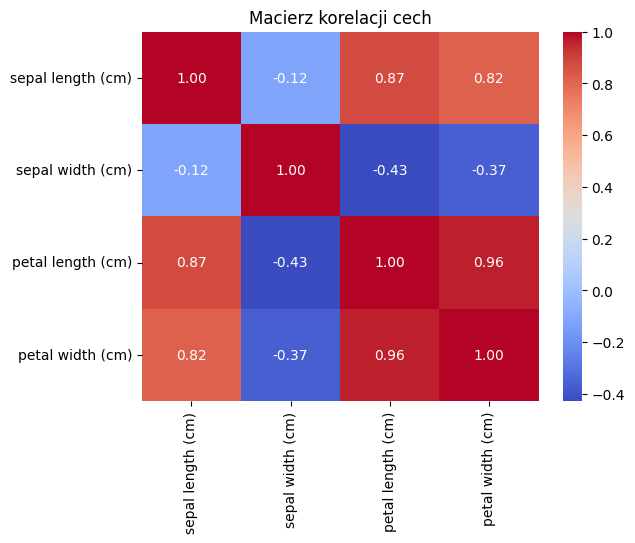

In [360]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji cech')
plt.show()

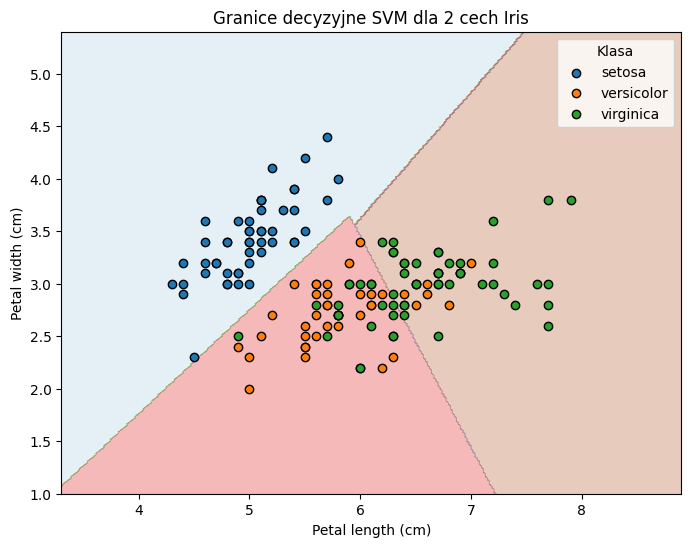

In [361]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC


iris = datasets.load_iris()
X = iris.data[:, :2]  # Pierwsze 2 cechy
y = iris.target


clf = SVC(kernel='linear', decision_function_shape='ovr')
clf.fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)


colors = ['tab:blue', 'tab:orange', 'tab:green']
for i, class_name in enumerate(iris.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=class_name,
                color=colors[i], edgecolors='k')

# Opisy i legenda
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Granice decyzyjne SVM dla 2 cech Iris")
plt.legend(title="Klasa")
plt.show()



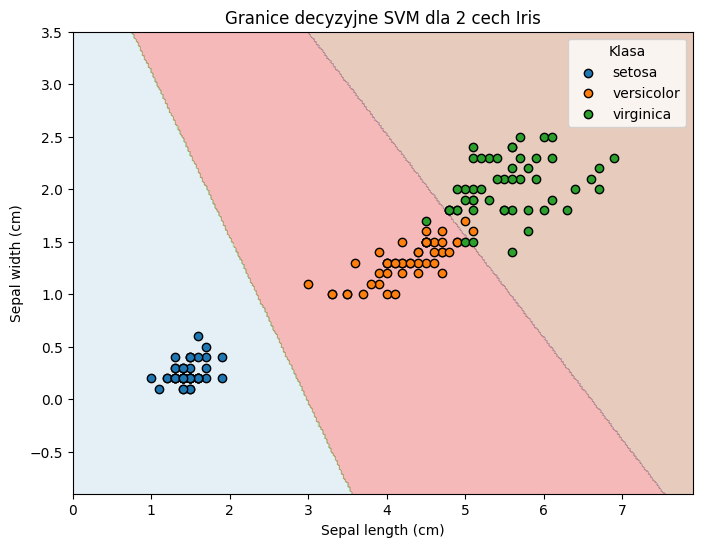

In [362]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Załaduj dane Iris
iris = datasets.load_iris()
X = iris.data[:, 2:]  # Pierwsze 2 cechy
y = iris.target

# Trening modelu SVM
clf = SVC(kernel='linear', decision_function_shape='ovr')
clf.fit(X, y)

# Siatka
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Rysuj tło
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)

# Rysuj punkty danych
colors = ['tab:blue', 'tab:orange', 'tab:green']
for i, class_name in enumerate(iris.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=class_name,
                color=colors[i], edgecolors='k')

# Opisy i legenda
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Granice decyzyjne SVM dla 2 cech Iris")
plt.legend(title="Klasa")
plt.show()


Zadanie 3

In [363]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = svm.SVC(kernel='linear',degree=3, C=1000, random_state=1, probability=True, decision_function_shape='ovr')

clf.fit(X_train,y_train)

SVC(C=1000, kernel='linear', probability=True, random_state=1)

In [364]:
y_pred = clf.predict(X_test)

print("Dokładność:", accuracy_score(y_test, y_pred))

Dokładność: 1.0


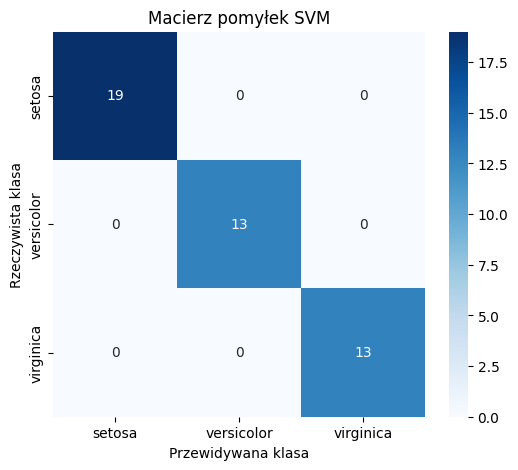

In [365]:
# Oblicz macierz pomyłek
cm = confusion_matrix(y_test, y_pred)

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Przewidywana klasa')
plt.ylabel('Rzeczywista klasa')
plt.title('Macierz pomyłek SVM')
plt.show()